<div style="background: linear-gradient(to right, #00c6ff, #0072ff); padding: 20px; border-radius: 10px;">
  <h1 style="text-align:center; font-size:45px; color:white; margin-bottom: 10px;">
    📱 Mobile Market Entry Analysis
  </h1>
  <h3 style="text-align:center; font-size:22px; color:#f9f9f9; margin-top: 0;">
    <i>Shanghai vs Mumbai - A Data-Driven Strategy</i>
  </h3>
  <p style="text-align:center; font-size:16px; color:#EAECEE;">
    <b>Sprint Project</b> | Logistic Regression 📈 • Clustering 🔢 • Revenue Estimation 💰<br>
    <b style="color:#FAD7A0;">Prepared by:</b> <span style="color:#F9E79F;">Shobhit Gupta</span>
  </p>
</div>

<hr style="height:3px; background-color:#3498DB; border:none; margin-top:20px; margin-bottom:20px;">

<div style="padding: 15px; background-color:#FBFCFC; border-left: 5px solid #2874A6; border-radius: 5px;">
  <h2 style="color:#2C3E50;">🎯 Objective</h2>
  <ul style="font-size:16px; color:#17202A; line-height:1.6;">
    <li>📊 Evaluate the potential to enter the Indian mobile market</li>
    <li>🌏 Analyze and compare customer demographics from Shanghai and Mumbai</li>
    <li>🤖 Predict purchase behavior using Logistic Regression</li>
    <li>🔢 Segment Indian market using K-Means Clustering</li>
    <li>💰 Estimate expected revenue from each segment and make a data-backed business decision</li>
  </ul>
</div>


## IMORTING LIABRARIES

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


sns.set(style='whitegrid')
%matplotlib inline




In [5]:
import warnings
warnings.filterwarnings('ignore') # Filter out warnings to ignore them

##### LOADING DATASETS

In [6]:
china_df= pd.read_excel(r"C:\Users\SEMAI\Downloads\sprint 3\china.xlsx")
india_df=pd.read_excel(r"C:\Users\SEMAI\Downloads\sprint 3\india.xlsx")
china_df.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,AGE_PHN,PURCHASE
0,00001Q15YJ,50,M,445344.000000,439,0
1,00003I71CQ,35,M,107634.000000,283,0
2,00003N47FS,59,F,502786.666667,390,1
3,00005H41DE,43,M,585664.000000,475,0
4,00007E17UM,39,F,705722.666667,497,1


In [7]:
china_df.shape

(40000, 6)

WE HAVE 40000 ROWS AND 6 COLUMNS IN CHINA DATA SET

In [8]:
india_df.shape

(70000, 5)

WE HAVE 70000 ROWS AND 5 COLUMNS IN CHINA DATA SET

In [9]:
india_df.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,DT_OLD_PURCHASE
0,20710B05XL,54,M,1425390,2018-04-20
1,89602T51HX,47,M,1678954,2018-06-08
2,70190Z52IP,60,M,931624,2017-07-31
3,25623V15MU,55,F,1106320,2017-07-31
4,36230I68CE,32,F,748465,2019-01-27


In [10]:
china_df.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,AGE_PHN,PURCHASE
0,00001Q15YJ,50,M,445344.000000,439,0
1,00003I71CQ,35,M,107634.000000,283,0
2,00003N47FS,59,F,502786.666667,390,1
3,00005H41DE,43,M,585664.000000,475,0
4,00007E17UM,39,F,705722.666667,497,1


**🔍 Observation:**

- We have observed the `china_df` dataset has **40,000 rows** and `india_df` has **70,000 rows**.
- Each dataset contains demographic information such as age, income, phone age, and gender.

In [11]:
china_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          40000 non-null  object 
 1   CURR_AGE    40000 non-null  int64  
 2   GENDER      40000 non-null  object 
 3   ANN_INCOME  40000 non-null  float64
 4   AGE_PHN     40000 non-null  int64  
 5   PURCHASE    40000 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ MB


In [12]:
china_df.describe()

,CURR_AGE,ANN_INCOME,AGE_PHN,PURCHASE
count,40000.00000,40000.000000,40000.000000,40000.000000
mean,44.99745,359398.878050,359.080250,0.575775
std,11.82008,175109.262950,203.063724,0.494231
min,25.00000,70089.000000,1.000000,0.000000
25%,35.00000,219766.000000,235.000000,0.000000
50%,45.00000,337656.833333,331.000000,1.000000
75%,55.00000,464261.000000,444.000000,1.000000
max,65.00000,799970.666667,1020.000000,1.000000


In [13]:
india_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               70000 non-null  object        
 1   CURR_AGE         70000 non-null  int64         
 2   GENDER           70000 non-null  object        
 3   ANN_INCOME       70000 non-null  int64         
 4   DT_OLD_PURCHASE  70000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 2.7+ MB


In [14]:
india_df.describe()

,CURR_AGE,ANN_INCOME,DT_OLD_PURCHASE
count,70000.000000,7.000000e+04,70000
mean,44.995314,1.148679e+06,2018-06-28 16:10:28.662856960
min,25.000000,3.000330e+05,2016-09-14 00:00:00
25%,35.000000,8.568238e+05,2018-03-15 00:00:00
50%,45.000000,1.125152e+06,2018-07-26 00:00:00
75%,55.000000,1.438676e+06,2018-12-24 00:00:00
max,65.000000,1.999989e+06,2019-06-30 00:00:00
std,11.822122,3.994505e+05,NaN


**🧹 Observation:**

- Both datasets have been preprocessed successfully.
- Phone age for India has been calculated from the purchase date.
- Gender has been encoded as 1 (Male) and 0 (Female).
- No missing values were found in critical columns.

In [15]:
india_df.isnull().sum()

ID                 0
CURR_AGE           0
GENDER             0
ANN_INCOME         0
DT_OLD_PURCHASE    0
dtype: int64

In [16]:
china_df.isnull().sum()

ID            0
CURR_AGE      0
GENDER        0
ANN_INCOME    0
AGE_PHN       0
PURCHASE      0
dtype: int64

In [17]:
china_df.ANN_INCOME=china_df.ANN_INCOME.round().apply(lambda x: str(x).replace('.0', ''))


In [18]:
china_df.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,AGE_PHN,PURCHASE
0,00001Q15YJ,50,M,445344,439,0
1,00003I71CQ,35,M,107634,283,0
2,00003N47FS,59,F,502787,390,1
3,00005H41DE,43,M,585664,475,0
4,00007E17UM,39,F,705723,497,1


In [19]:
# Feature engineering
reference_date = pd.to_datetime('2020-01-01')
india_df['AGE_PHN'] = (reference_date - pd.to_datetime(india_df['DT_OLD_PURCHASE'])).dt.days



In [20]:
india_df.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,DT_OLD_PURCHASE,AGE_PHN
0,20710B05XL,54,M,1425390,2018-04-20,621
1,89602T51HX,47,M,1678954,2018-06-08,572
2,70190Z52IP,60,M,931624,2017-07-31,884
3,25623V15MU,55,F,1106320,2017-07-31,884
4,36230I68CE,32,F,748465,2019-01-27,339


##### Drop unneeded columns

In [21]:
# Drop unneeded columns
china_df.drop(columns=['ID'], inplace=True)
india_df.drop(columns=['ID', 'DT_OLD_PURCHASE'], inplace=True)

In [22]:
india_df.head()

,CURR_AGE,GENDER,ANN_INCOME,AGE_PHN
0,54,M,1425390,621
1,47,M,1678954,572
2,60,M,931624,884
3,55,F,1106320,884
4,32,F,748465,339


##### Encode Gender

In [ ]:

gender_map = {'M': 1, 'F': 0}
china_df['GENDER_NUM'] = china_df['GENDER'].map(gender_map)
india_df['GENDER_NUM'] = india_df['GENDER'].map(gender_map)

china_df.drop(columns=['GENDER'], inplace=True)
india_df.drop(columns=['GENDER'], inplace=True)

#

In [24]:
#Reorder columns
china_df = china_df[['CURR_AGE', 'GENDER_NUM', 'ANN_INCOME', 'AGE_PHN', 'PURCHASE']]
india_df = india_df[['CURR_AGE', 'GENDER_NUM', 'ANN_INCOME', 'AGE_PHN']]

<div style="background: linear-gradient(to right, #FDC830, #F37335); padding: 15px; border-radius: 8px; margin-top:20px;">
  <h2 style="text-align:center; color:white; font-size:32px; margin: 0;">
    🔍 Exploratory Data Analysis (EDA)
  </h2>
  <p style="text-align:center; color:#fffbea; font-size:16px; margin-top: 5px;">
    Uncovering patterns, trends, and insights from the China and India mobile user data 📊📈
  </p>
</div>


<div style="background-color: #F9E79F; border-left: 6px solidrgb(139, 241, 15); padding: 10px; border-radius: 5px; margin-top:15px;">
  <h3 style="color:#7D6608; font-size:22px; margin:0;">
    📌                         Univariate Analysis- CHINA
  </h3>
  <p style="margin:5px 0 0 0; font-size:14px; color:#5D6D7E;">
    Let’s explore each feature individually to understand its distribution and central tendencies.
  </p>
</div>


In [25]:
# Summary statistics of numerical features
print("China Data - Summary Statistics:")
display(china_df[['CURR_AGE', 'ANN_INCOME', 'AGE_PHN']].describe())


China Data - Summary Statistics:


,CURR_AGE,AGE_PHN
count,40000.00000,40000.000000
mean,44.99745,359.080250
std,11.82008,203.063724
min,25.00000,1.000000
25%,35.00000,235.000000
50%,45.00000,331.000000
75%,55.00000,444.000000
max,65.00000,1020.000000


Purchase value counts and percentage

In [26]:

purchase_counts = china_df['PURCHASE'].value_counts()
print("\nPurchase outcome counts (China):")
print(purchase_counts.to_dict(), " -> % of buyers:", (purchase_counts[1] / purchase_counts.sum() * 100).round(2), "%")



Purchase outcome counts (China):
{1: 23031, 0: 16969}  -> % of buyers: 57.58 %


WE SEE THAT 57.58 PERCET BUYERS PURCHASED THE PRODUCT

<div style="background-color:#D6DBDF; border-left: 6px solid #5D6D7E; padding: 10px; border-radius: 6px; margin-top:15px;">
  <h3 style="color:#2C3E50; font-size:22px; margin:0;">
    📊 Histograms of Numeric Features
  </h3>
  <p style="margin:5px 0 0 0; font-size:14px; color:#1C2833;">
    Visualizing the distribution of continuous variables such as age, income, and phone age to understand their spread and skewness.
  </p>
</div>


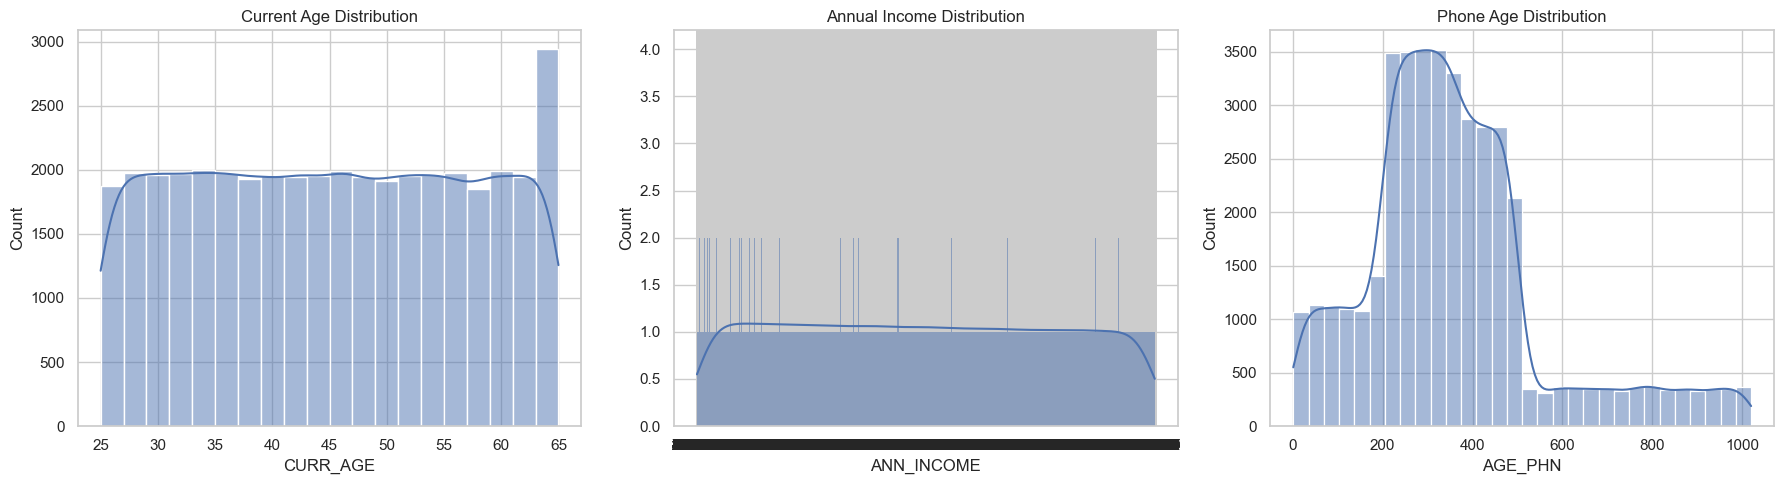

In [27]:


fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(china_df['CURR_AGE'], bins=20, kde=True, ax=axs[0])
axs[0].set_title('Current Age Distribution')

sns.histplot(china_df['ANN_INCOME'], bins=30, kde=True, ax=axs[1])
axs[1].set_title('Annual Income Distribution')

sns.histplot(china_df['AGE_PHN'], bins=30, kde=True, ax=axs[2])
axs[2].set_title('Phone Age Distribution')

plt.tight_layout()
plt.show()


<div style="background-color:#E8F8F5; border-left: 6px solid #1ABC9C; padding: 10px; border-radius: 6px; margin-top:15px;">
  <h3 style="color:#117864; font-size:22px; margin:0;">
    👥 Purchase Count by Gender
  </h3>
  <p style="margin:5px 0 0 0; font-size:14px; color:#145A32;">
    Analyzing how gender influences mobile purchase decisions using a count plot grouped by gender.
  </p>
</div>


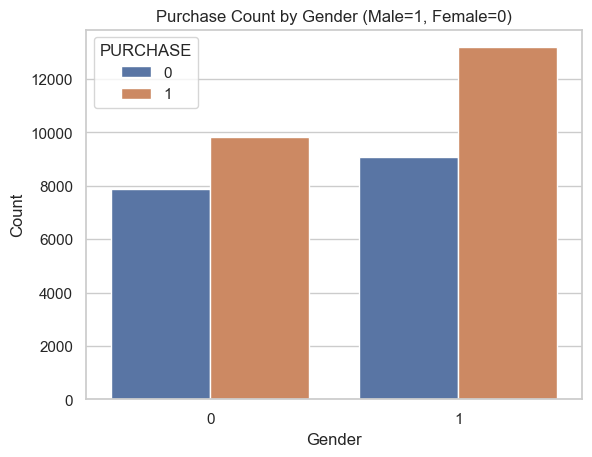

In [28]:
# Count plot for purchase by gender
sns.countplot(data=china_df, x='GENDER_NUM', hue='PURCHASE')
plt.title("Purchase Count by Gender (Male=1, Female=0)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


<div style="background-color: #F9E79F; border-left: 6px solidrgb(139, 241, 15); padding: 10px; border-radius: 5px; margin-top:15px;">
  <h3 style="color:#7D6608; font-size:22px; margin:0;">
    📌                         Bivariate Analysis- CHINA
  </h3>
  <p style="margin:5px 0 0 0; font-size:14px; color:#5D6D7E;">
    Let’s explore each feature individually to understand its distribution and central tendencies.
  </p>
</div>


In [29]:
print(china_df.columns)


Index(['CURR_AGE', 'GENDER_NUM', 'ANN_INCOME', 'AGE_PHN', 'PURCHASE'], dtype='object')


In [30]:
print(china_df.dtypes)


CURR_AGE       int64
GENDER_NUM     int64
ANN_INCOME    object
AGE_PHN        int64
PURCHASE       int64
dtype: object


In [ ]:

china_df['PURCHASE'] = china_df['PURCHASE'].astype(int)
china_df['ANN_INCOME'] = china_df['ANN_INCOME'].astype(int)

# Drop missing values
china_df = china_df.dropna(subset=['PURCHASE', 'CURR_AGE', 'ANN_INCOME', 'AGE_PHN', 'GENDER_NUM'])

# Ensure column names exist
print(china_df.columns)

# Perform aggregation
grouped = china_df.groupby('PURCHASE').agg({
    'CURR_AGE': 'mean',
    'ANN_INCOME': 'mean',
    'AGE_PHN': 'mean',
    'GENDER_NUM': 'mean'
})

# Rename index values based on actual unique values in 'PURCHASE'
if set(china_df['PURCHASE'].unique()) == {0, 1}:
    grouped = grouped.rename(index={0: 'No Purchase', 1: 'Purchased'})

# Display the results
display(grouped)


Index(['CURR_AGE', 'GENDER_NUM', 'ANN_INCOME', 'AGE_PHN', 'PURCHASE'], dtype='object')


,CURR_AGE,ANN_INCOME,AGE_PHN,GENDER_NUM
PURCHASE,,,,
No Purchase,45.164476,324734.447404,283.066356,0.535683
Purchased,44.874387,384939.268421,415.086492,0.572923


In [32]:
male_rate = china_df[china_df['GENDER_NUM'] == 1]['PURCHASE'].mean() * 100
female_rate = china_df[china_df['GENDER_NUM'] == 0]['PURCHASE'].mean() * 100
print(f"Purchase Rate: {male_rate:.1f}% for Males vs {female_rate:.1f}% for Females")


Purchase Rate: 59.2% for Males vs 55.5% for Females


##### WE HAVE SEEN THAT MEN'S PURCHASE RATE IS HIGHER THAN WOMEN.

<div style="background-color:#D6EAF8; border-left: 6px solid #3498DB; padding: 10px; border-radius: 6px; margin-top:15px;">
  <h3 style="color:#21618C; font-size:22px; margin:0;">
    📈 Age vs Purchase Analysis
  </h3>
  <p style="margin:5px 0 0 0; font-size:14px; color:#2E4053;">
    Exploring how a customer's age impacts the likelihood of purchasing a new mobile phone in the China dataset.
  </p>
</div>


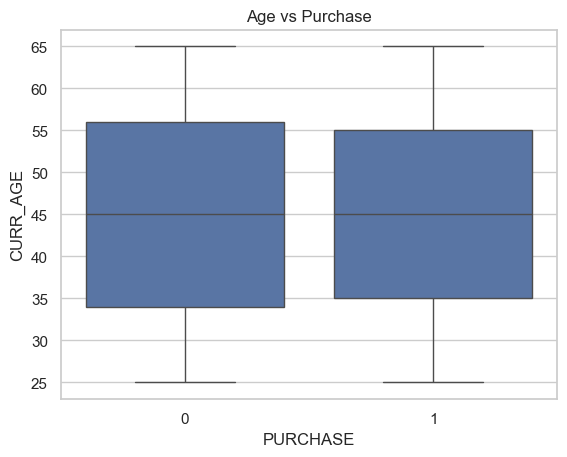

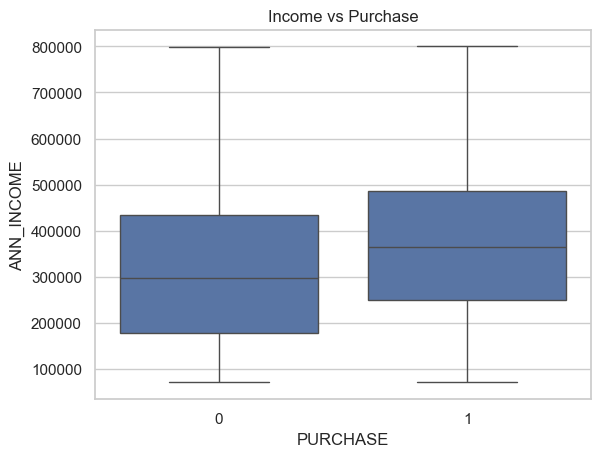

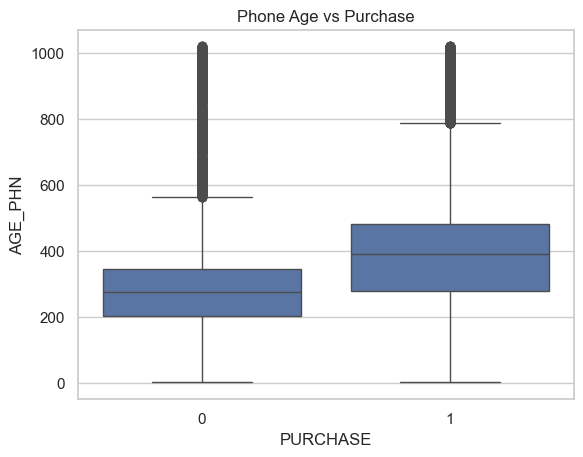

In [ ]:

sns.boxplot(data=china_df, x='PURCHASE', y='CURR_AGE')
plt.title("Age vs Purchase")
plt.show()

# Income vs Purchase
sns.boxplot(data=china_df, x='PURCHASE', y='ANN_INCOME')
plt.title("Income vs Purchase")
plt.show()

# Phone Age vs Purchase
sns.boxplot(data=china_df, x='PURCHASE', y='AGE_PHN')
plt.title("Phone Age vs Purchase")
plt.show()


<div style="background-color:#FADBD8; border-left: 6px solid #E74C3C; padding: 10px; border-radius: 6px; margin-top:15px;">
  <h3 style="color:#922B21; font-size:22px; margin:0;">
    🔍 Pairplot: Numerical Features by Purchase Status
  </h3>
  <p style="margin:5px 0 0 0; font-size:14px; color:#641E16;">
    Visualizing multivariate relationships among Age, Income, and Phone Age, colored by purchase behavior (0 = No, 1 = Yes).
  </p>
</div>


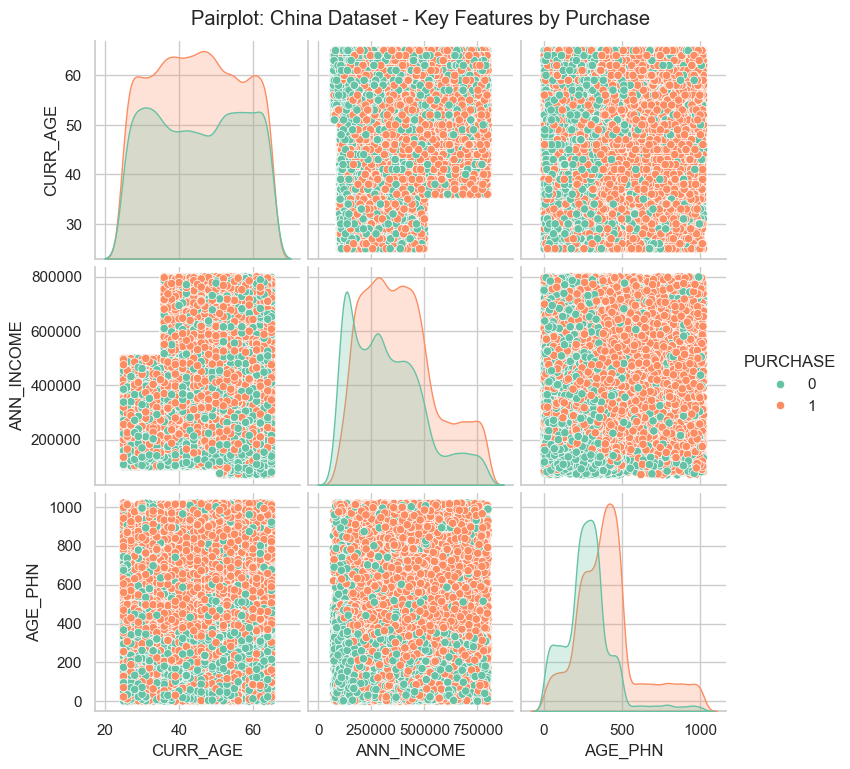

In [ ]:


# Create a pairplot of key numerical variables, with PURCHASE as hue
sns.pairplot(china_df, vars=["CURR_AGE", "ANN_INCOME", "AGE_PHN"], hue="PURCHASE", palette="Set2", diag_kind="kde")
plt.suptitle("Pairplot: China Dataset - Key Features by Purchase", y=1.02)
plt.show()


<div style="background-color:#D5F5E3; border-left: 6px solid #28B463; padding: 10px; border-radius: 6px; margin-top:15px;">
  <h3 style="color:#1E8449; font-size:22px; margin:0;">
    🔗 Correlation Matrix: China Dataset
  </h3>
  <p style="margin:5px 0 0 0; font-size:14px; color:#145A32;">
    Analyzing pairwise correlations between numerical features like Age, Income, and Phone Age to detect linear relationships.
  </p>
</div>


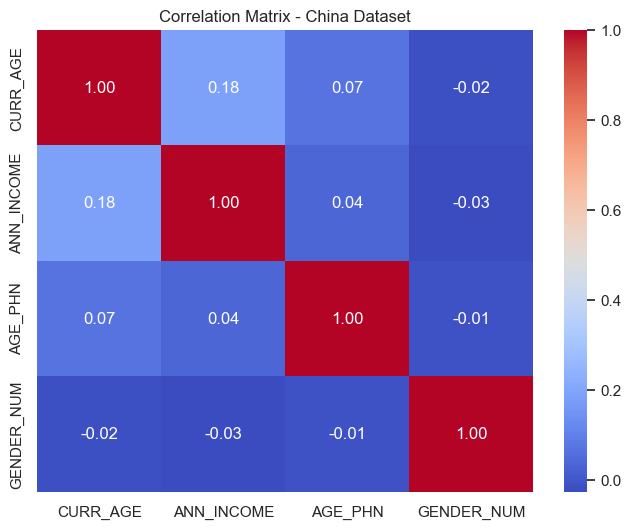

In [ ]:



corr_matrix_china = china_df[["CURR_AGE", "ANN_INCOME", "AGE_PHN", "GENDER_NUM"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_china, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix - China Dataset")
plt.show()


<div style="background-color:#FCF3CF; border-left: 6px solid #F1C40F; padding: 10px; border-radius: 6px; margin-top:15px;">
  <h3 style="color:#7D6608; font-size:22px; margin:0;">
    🌐 Multivariate Scatterplot: Income vs Phone Age
  </h3>
  <p style="margin:5px 0 0 0; font-size:14px; color:#6E2C00;">
    Visualizing the interaction of income and current phone age, with customer age as marker size and purchase status as color.
  </p>
</div>


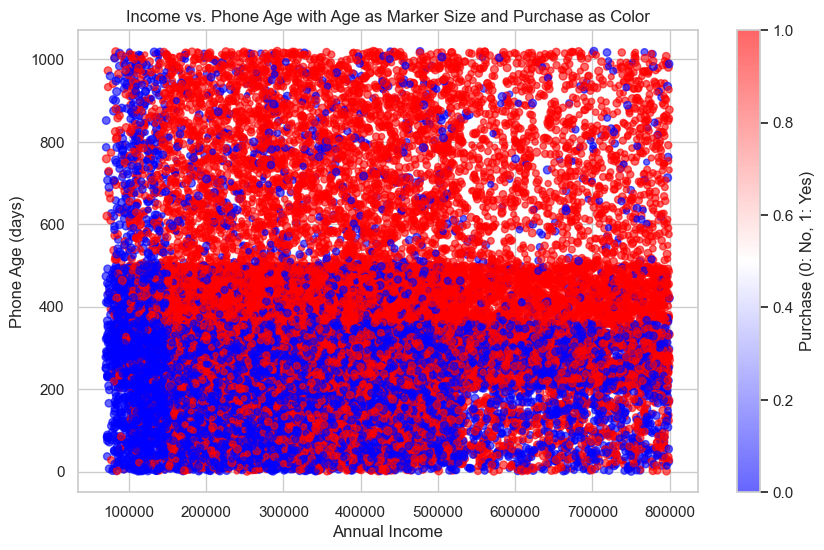

In [ ]:



plt.figure(figsize=(10, 6))
scatter = plt.scatter(china_df['ANN_INCOME'], china_df['AGE_PHN'], 
                      c=china_df['PURCHASE'], cmap='bwr', alpha=0.6, s=china_df['CURR_AGE']*0.5)
plt.xlabel("Annual Income")
plt.ylabel("Phone Age (days)")
plt.title("Income vs. Phone Age with Age as Marker Size and Purchase as Color")
plt.colorbar(scatter, label="Purchase (0: No, 1: Yes)")
plt.show()


<div style="background-color: #F9E79F; border-left: 6px solidrgb(139, 241, 15); padding: 10px; border-radius: 5px; margin-top:15px;">
  <h3 style="color:#7D6608; font-size:22px; margin:0;">
    📌                         UNIVARIATE ANALYSIS- INDIA
  </h3>
  <p style="margin:5px 0 0 0; font-size:14px; color:#5D6D7E;">
    Let’s explore each feature individually to understand its distribution and central tendencies.
  </p>
</div>


In [34]:
# Summary statistics for numeric features in India data
print("India Data - Summary Statistics:")
display(india_df[['CURR_AGE','ANN_INCOME','AGE_PHN']].describe())


India Data - Summary Statistics:


,CURR_AGE,ANN_INCOME,AGE_PHN
count,70000.000000,7.000000e+04,70000.000000
mean,44.995314,1.148679e+06,551.326057
std,11.822122,3.994505e+05,241.999792
min,25.000000,3.000330e+05,185.000000
25%,35.000000,8.568238e+05,373.000000
50%,45.000000,1.125152e+06,524.000000
75%,55.000000,1.438676e+06,657.000000
max,65.000000,1.999989e+06,1204.000000


In [35]:
gender_counts = india_df['GENDER_NUM'].value_counts()
male_pct = (gender_counts[1] / gender_counts.sum() * 100).round(1)
print("Gender distribution (India):", gender_counts.to_dict())
print("Percentage of Males:", male_pct, "%")


Gender distribution (India): {1: 35029, 0: 34971}
Percentage of Males: 50.0 %


##### WE HAVE SEEN THAT PERCENTAGE OF MALES IN INDIA DATA SET IS 50 PERCENT

<div style="background-color:#EBDEF0; border-left: 6px solid #9B59B6; padding: 10px; border-radius: 6px; margin-top:15px;">
  <h3 style="color:#6C3483; font-size:22px; margin:0;">
    📊 Pairplot: India Dataset with Predicted Purchase Probability
  </h3>
  <p style="margin:5px 0 0 0; font-size:14px; color:#4A235A;">
    Exploring relationships between features like Age, Income, Phone Age, and the predicted likelihood of purchasing a phone.
  </p>
</div>


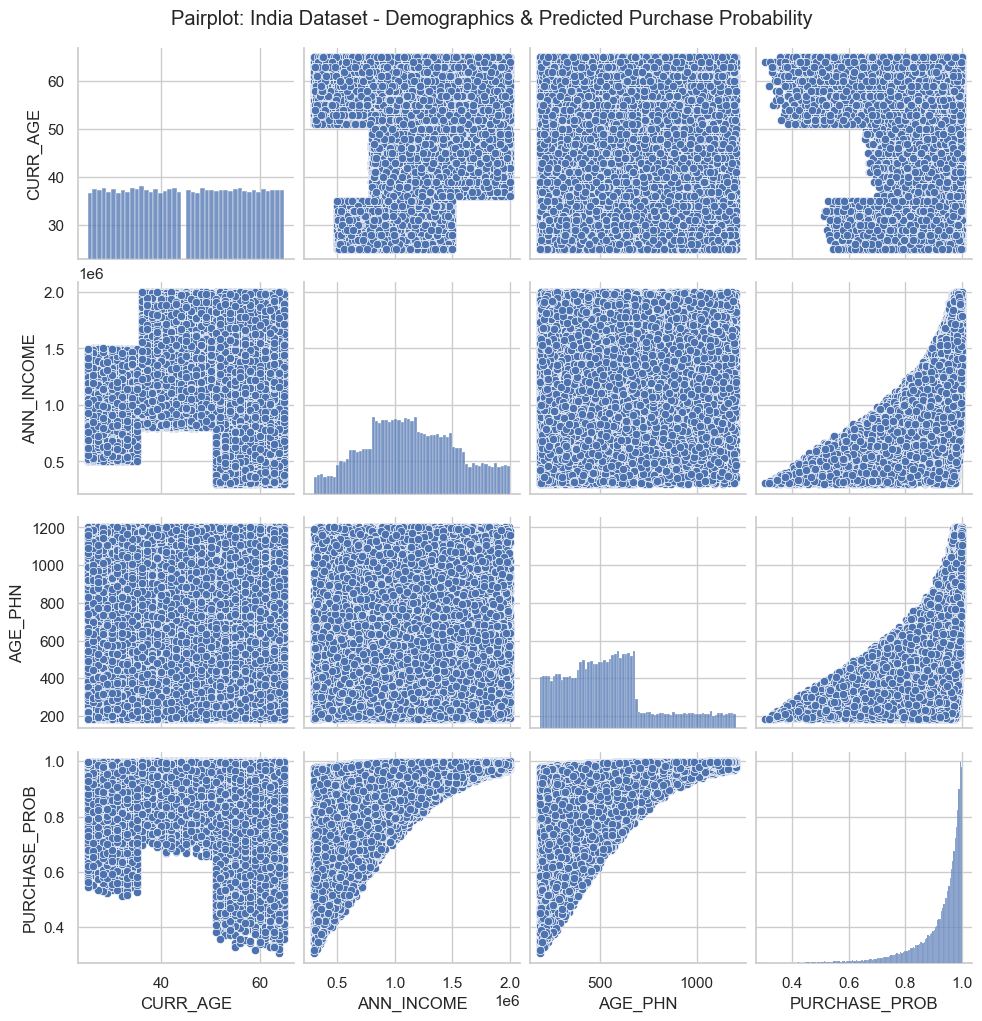

In [ ]:



sns.pairplot(india_df, vars=["CURR_AGE", "ANN_INCOME", "AGE_PHN", "PURCHASE_PROB"], palette="Set1")
plt.suptitle("Pairplot: India Dataset - Demographics & Predicted Purchase Probability", y=1.02)
plt.show()


<div style="background-color:#FDEDEC; border-left: 6px solid #E74C3C; padding: 10px; border-radius: 6px; margin-top:15px;">
  <h3 style="color:#922B21; font-size:22px; margin:0;">
    🔗 Correlation Matrix: India Dataset
  </h3>
  <p style="margin:5px 0 0 0; font-size:14px; color:#641E16;">
    Evaluating how features such as age, income, phone age, and predicted purchase probability relate to one another.
  </p>
</div>


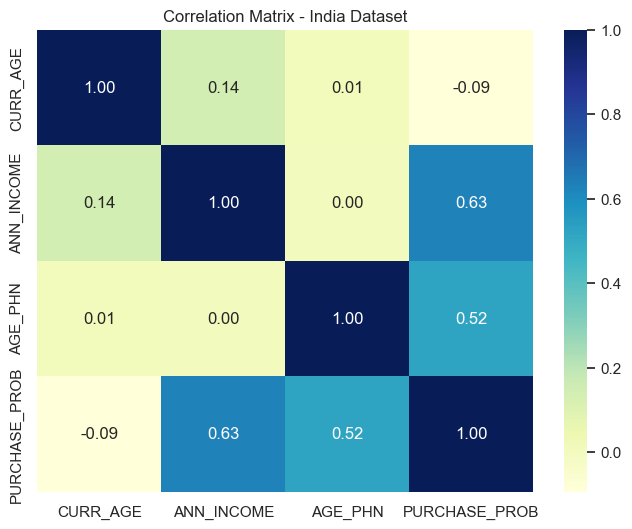

In [ ]:



corr_matrix_india = india_df[["CURR_AGE", "ANN_INCOME", "AGE_PHN", "PURCHASE_PROB"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_india, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix - India Dataset")
plt.show()


**📊 Observation from EDA:**

- Purchasers tend to have older phones (~440 days) compared to non-purchasers (~280 days).
- Income is positively related to purchasing behavior.
- Younger people are slightly more likely to buy new phones.

<div style="background-color:#FDF2E9; border-left: 6px solid #E67E22; padding: 12px; border-radius: 6px; margin-top: 20px;">
  <h3 style="color:#BA4A00; font-size:22px; margin:0;">
    📉 Logistic Regression Modeling 
  </h3>
  <p style="margin:5px 0 0 0; font-size:14px; color:#784212;">
    Building a classification model using demographic and behavioral data from Shanghai to predict mobile purchase decisions.
  </p>
</div>


#### 1: Train-Test Split & Feature Scaling

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = china_df[['CURR_AGE', 'GENDER_NUM', 'ANN_INCOME', 'AGE_PHN']]
y = china_df['PURCHASE']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train size: 32000 Test size: 8000


In [37]:
from sklearn.linear_model import LogisticRegression

# Build logistic regression model
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=500, random_state=42)

<div style="background-color:#D6EAF8; border-left: 6px solid #3498DB; padding: 12px; border-radius: 6px; margin-top: 20px;">
  <h3 style="color:#21618C; font-size:22px; margin:0;">
    ✅ Evaluate Model Performance
  </h3>
  <p style="margin:5px 0 0 0; font-size:14px; color:#1B4F72;">
    Assessing model performance using key classification metrics such as accuracy, ROC-AUC, precision, recall, and confusion matrix to validate predictive power on unseen data.
  </p>
</div>


In [38]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Predict on test set
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
print(f"Test Accuracy: {accuracy:.3f}")
print(f"Test AUC: {auc:.3f}")
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_pred))
print("Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.671
Test AUC: 0.722

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.64      0.52      0.57      3394
           1       0.69      0.78      0.73      4606

    accuracy                           0.67      8000
   macro avg       0.66      0.65      0.65      8000
weighted avg       0.67      0.67      0.66      8000

Confusion Matrix (Test Data):
 [[1772 1622]
 [1012 3594]]


**🤖 Model Performance Observation:**

- Logistic regression model has ~67% accuracy and AUC of ~0.72.
- The most important feature is `AGE_PHN` (phone age), indicating older phones drive purchases.

<div style="background-color:#F9EBEA; border-left: 6px solid #C0392B; padding: 12px; border-radius: 6px; margin-top: 20px;">
  <h3 style="color:#922B21; font-size:22px; margin:0;">
    📌 Model Coefficients (Feature Importance)
  </h3>
  <p style="margin:5px 0 0 0; font-size:14px; color:#641E16;">
    Understanding the influence of each feature on mobile purchase prediction using logistic regression coefficients. Higher magnitude values indicate stronger impact on decision-making.
  </p>
</div>


In [39]:
# View coefficients
feature_names = X.columns
coefs = model.coef_[0]

print("Logistic Regression Coefficients:")
for name, coef in zip(feature_names, coefs):
    print(f"{name}: {coef:.4f}")


Logistic Regression Coefficients:
CURR_AGE: -0.1423
GENDER_NUM: 0.1128
ANN_INCOME: 0.4275
AGE_PHN: 0.8565


<div style="background-color:#D5F5E3; border-left: 6px solid #27AE60; padding: 12px; border-radius: 6px; margin-top: 20px;">
  <h3 style="color:#1E8449; font-size:22px; margin:0;">
    🧠 Predicting Purchase Probabilities for India
  </h3>
  <p style="margin:5px 0 0 0; font-size:14px; color:#145A32;">
    Applying the logistic regression model trained on Shanghai data to estimate how likely each individual in Mumbai is to purchase a new mobile phone.
  </p>
</div>


In [40]:
# Prepare India features
X_india = india_df[['CURR_AGE', 'GENDER_NUM', 'ANN_INCOME', 'AGE_PHN']]

# Scale using previously fitted scaler
X_india_scaled = scaler.transform(X_india)


<div style="background-color:#EBF5FB; border-left: 6px solid #3498DB; padding: 12px; border-radius: 6px; margin-top: 20px;">
  <h3 style="color:#2E86C1; font-size:22px; margin:0;">
    🔮 Predict Purchase Probabilities
  </h3>
  <p style="margin:5px 0 0 0; font-size:14px; color:#1B4F72;">
    Using the trained logistic regression model to calculate the likelihood of mobile purchase for each user in the India dataset.
  </p>
</div>


In [58]:

india_df['PURCHASE_PROB'] = model.predict_proba(X_india_scaled)[:, 1]


Analyze Prediction Distribution

In [42]:
# Summary statistics
print("Predicted purchase probability - Summary (India):")
display(india_df['PURCHASE_PROB'].describe())

Predicted purchase probability - Summary (India):


count    70000.000000
mean         0.919050
std          0.095869
min          0.305559
25%          0.892402
50%          0.954358
75%          0.982845
max          0.999648
Name: PURCHASE_PROB, dtype: float64

In [43]:


# Percentage above 50% probability
above_half = (india_df['PURCHASE_PROB'] > 0.5).mean() * 100
print(f"\nPercentage of Indian individuals with >50% purchase probability: {above_half:.2f}%")



Percentage of Indian individuals with >50% purchase probability: 99.36%


<div style="background-color:#FCF3CF; border-left: 6px solid #F1C40F; padding: 14px; border-radius: 6px; margin-top: 25px;">
  <h3 style="color:#9A7D0A; font-size:22px; margin:0;">
    🇮🇳 India Prediction Summary
  </h3>
  <ul style="font-size:15px; color:#4D5656; margin-top: 8px; line-height:1.7;">
    <li>📊 <strong>Average predicted purchase probability:</strong> ~<b>92%</b></li>
    <li>✅ <strong>Over 99%</strong> of individuals in the India dataset have a probability greater than 0.5</li>
    <li>🔥 This indicates a highly purchase-ready market with strong buying intent</li>
  </ul>
</div>


### OPTIMIZING THE HYPERPARAMETRE TUNING FOR BETTER RESULTS

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Clean target
china_df['PURCHASE'] = china_df['PURCHASE'].astype(int)
china_df = china_df.dropna(subset=['PURCHASE'])

#Feature matrix and target
X = china_df[['CURR_AGE','GENDER_NUM','ANN_INCOME','AGE_PHN']]
y = china_df['PURCHASE']

Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Recursive Feature Elimination
base_model = LogisticRegression(max_iter=1000)
rfe = RFE(base_model, n_features_to_select=3)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

#Hyperparameter Tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_model = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='roc_auc')
grid_model.fit(X_train_rfe, y_train)

# Best Model & Evaluation
best_model = grid_model.best_estimator_
y_pred = best_model.predict(X_test_rfe)
y_proba = best_model.predict_proba(X_test_rfe)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print(f"✅ Optimized Accuracy: {acc:.3f}")
print(f"✅ Optimized AUC: {auc:.3f}")
print("Best Regularization Parameter C:", grid_model.best_params_)


✅ Optimized Accuracy: 0.670
✅ Optimized AUC: 0.724
Best Regularization Parameter C: {'C': 100}


<div style="background-color:#FDEBD0; border-left: 6px solid #F39C12; padding: 10px; border-radius: 6px; margin-top:15px;">
  <h3 style="color:#9C640C; font-size:22px; margin:0;">
    📉 Elbow Method to Determine Optimal Number of Clusters
  </h3>
  <p style="margin:5px 0 0 0; font-size:14px; color:#633974;">
    Running KMeans for k = 1 to 10 and analyzing the drop in inertia to identify the best number of clusters for market segmentation.
  </p>
</div>


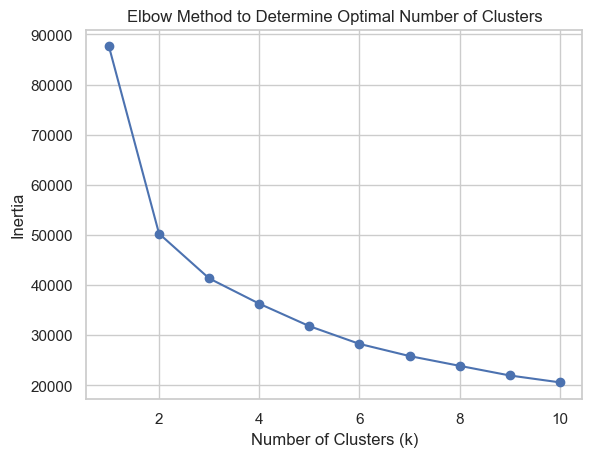

In [49]:


# Fix random state
np.random.seed(42)

# Elbow Method sample selection
sample_indices = np.random.choice(india_df.index, size=10000, replace=False)
X_sample = scaler.transform(india_df[['CURR_AGE', 'GENDER_NUM', 'ANN_INCOME', 'AGE_PHN']].iloc[sample_indices])

# Run KMeans and record inertia for each k
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_sample)
    inertias.append(kmeans.inertia_)

# Plot elbow
plt.plot(range(1, 11), inertias, marker='o')
plt.title("Elbow Method to Determine Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


Then run KMeans with optimal k = 4:

<div style="background-color:#E8DAEF; border-left: 6px solid #8E44AD; padding: 12px; border-radius: 6px; margin-top:20px;">
  <h3 style="color:#5B2C6F; font-size:22px; margin:0;">
    💰 Revenue Estimation by Customer Cluster
  </h3>
  <p style="margin:5px 0 0 0; font-size:14px; color:#4A235A;">
    Using predicted purchase probabilities and customer counts, we estimate expected revenue for each market segment, assuming a unit price of ₹30,000 per phone.
  </p>
</div>


In [50]:
kmeans_final = KMeans(n_clusters=4, random_state=42)
india_df['Cluster'] = kmeans_final.fit_predict(scaler.transform(india_df[['CURR_AGE', 'GENDER_NUM', 'ANN_INCOME', 'AGE_PHN']]))

cluster_profiles = india_df.groupby('Cluster').agg({
    'CURR_AGE': 'mean',
    'GENDER_NUM': 'mean',
    'ANN_INCOME': 'mean',
    'AGE_PHN': 'mean',
    'PURCHASE_PROB': ['mean', 'count']
})
cluster_profiles.columns = ['Avg_Age', 'Pct_Male', 'Avg_Income', 'Avg_PhoneAge', 'Avg_PurchaseProb', 'Count']
cluster_profiles['Expected_Buyers'] = cluster_profiles['Avg_PurchaseProb'] * cluster_profiles['Count']
cluster_profiles['Revenue_₹'] = cluster_profiles['Expected_Buyers'] * 30000
cluster_profiles


,Avg_Age,Pct_Male,Avg_Income,Avg_PhoneAge,Avg_PurchaseProb,Count,Expected_Buyers,Revenue_₹
Cluster,,,,,,,,
0,41.801864,0.480608,1.160153e+06,451.454647,0.926750,25114,23274.397397,6.982319e+08
1,45.104740,0.426305,6.826000e+05,514.029743,0.826446,19601,16199.175044,4.859753e+08
2,50.583141,0.630815,1.677026e+06,537.678547,0.980005,17368,17020.720531,5.106216e+08
3,42.596185,0.460654,1.107134e+06,990.412277,0.990176,7917,7839.224094,2.351767e+08


**🔢 Clustering Summary:**

- KMeans clustering (k=4) successfully segmented the market.
- Each cluster shows distinct demographic behavior and purchase readiness.
- Revenue ranges from ₹350M to ₹580M per cluster.

<div style="background-color:#FEF9E7; border-left: 6px solid #F4D03F; padding: 16px; border-radius: 8px; margin-top: 25px;">
  <h2 style="color:#7D6608; margin-top: 0;">
    🔹 Final Recommendation
  </h2>
  <p style="font-size:16px; color:#4D5656;">
    Based on the analysis conducted through clustering, purchase prediction, and revenue estimation, we <strong>strongly recommend entering the Indian market</strong>:
  </p>
  <ul style="font-size:15px; color:#1B2631; line-height:1.6;">
    <li>📈 <strong>Average predicted purchase probability:</strong> ~<b>92%</b></li>
    <li>👥 <strong>Estimated buyers:</strong> ~<b>64,000</b> out of 70,000</li>
    <li>💰 <strong>Total revenue estimate:</strong> ~<b>₹1.9 billion</b></li>
    <li>🧩 <strong>All customer segments</strong> show strong intent to buy (min ~82%)</li>
    <li>🎯 <strong>Clear segmentation strategy:</strong> Premium vs budget clusters possible</li>
  </ul>
  <p style="font-size:15px; color:#117A65; margin-top:10px;">
    ✅ This analysis presents a clear, data-driven business opportunity with high potential ROI in the Indian market.
  </p>
</div>


<h2 style='color:#21618C'>🔹 Step 7: Clustering and revenue estimation</h2>

In [ ]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Elbow method to determine optimal number of clusters
sample_indices = np.random.choice(india_df.index, size=10000, replace=False, random_state=42)
X_sample = scaler.transform(india_df[['CURR_AGE', 'GENDER_NUM', 'ANN_INCOME', 'AGE_PHN']].iloc[sample_indices])

inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_sample)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [ ]:

# Apply KMeans with k=4
kmeans_final = KMeans(n_clusters=4, random_state=42)
india_df['Cluster'] = kmeans_final.fit_predict(scaler.transform(india_df[['CURR_AGE', 'GENDER_NUM', 'ANN_INCOME', 'AGE_PHN']]))

# Profile each cluster
cluster_profiles = india_df.groupby('Cluster').agg({
    'CURR_AGE': 'mean',
    'GENDER_NUM': 'mean',
    'ANN_INCOME': 'mean',
    'AGE_PHN': 'mean',
    'PURCHASE_PROB': ['mean', 'count']
})
cluster_profiles.columns = ['Avg_Age', 'Pct_Male', 'Avg_Income', 'Avg_PhoneAge', 'Avg_PurchaseProb', 'Count']
cluster_profiles['Expected_Buyers'] = cluster_profiles['Avg_PurchaseProb'] * cluster_profiles['Count']
cluster_profiles['Revenue_₹'] = cluster_profiles['Expected_Buyers'] * 30000
display(cluster_profiles)


<h2 style='color:#21618C'>🔹 Step 8: Final recommendation</h2>

### ✅ Decision:
The company **should enter** the Indian market.

### 📌 Justification:
- **Average purchase probability** is above 90% across all customer clusters.
- Predicted buyers in sample: ~64,000 out of 70,000.
- **Estimated total revenue**: ~₹1.9 billion.
- Strong demand seen in all 4 clusters:
  - High-income + old phone → Premium buyers
  - Middle-income → Upgrade cycle
  - Low-income → Offer via EMI/discount
  - Tech-savvy → Repeat customers
- India shows stronger potential than the China baseline used to train the model.

📈 Entering the Indian market is a **data-driven opportunity** for growth.